## Starmap

Star Observations:
- The bottom right of the grid is closest to the Galactic Rim, thus has a greater overall star density
- Visually there appears to be a greater ratio of CONFIRMED to FALSE POSITIVE away from the Galactic Rim

Map Observations:
- Each square represents the stationary field of view of the Kepler Space Telescope
- Kepler was repointed 21 times in a grid search pattern during its 9 year mission
- The slight curvature of the grid represents the projection of a sphere onto a flat surface

In [1]:
# Python imports and settings
import numpy  as np
import pandas as pd
import seaborn as sns
import re
from pydash import py_ as _

from src.dataset_koi import koi, koi_columns, koi_column_types
from src.utilities import onehot_encode_comments

# https://stackoverflow.com/questions/11707586/how-do-i-expand-the-output-display-to-see-more-columns-of-a-pandas-dataframe
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)
pd.set_option('display.max_rows', 8)  # 8 is required for .describe()

sns.set(rc={'figure.figsize':(20,20)})

%load_ext autoreload
%autoreload 2

In [2]:
dataset = (
    pd.concat([
        koi['archive'][['koi_disposition']], 
        koi['stellar'],
        koi['KIC']
    ], axis=1)
    .sort_values(by='koi_disposition')
)
dataset

,koi_disposition,koi_steff,koi_slogg,koi_smet,koi_srad,koi_smass,koi_sparprov,ra,dec,koi_kepmag,koi_gmag,koi_rmag,koi_imag,koi_zmag,koi_jmag,koi_hmag,koi_kmag
kepoi_name,,,,,,,,,,,,,,,,,
K05834.01,CANDIDATE,6095.0,4.429,0.14,1.082,1.150,stellar,289.21732,48.204311,15.769,16.257,15.710,15.559,15.538,14.574,14.234,14.134
K02206.01,CANDIDATE,5751.0,4.458,-0.02,0.958,0.962,stellar,285.96802,48.679050,15.198,15.699,15.098,14.984,14.889,13.914,13.593,13.543
K04653.01,CANDIDATE,6392.0,4.399,0.07,1.162,1.232,stellar,286.56033,48.893051,13.520,13.838,13.452,13.383,13.376,12.556,12.273,12.255
K03168.01,CANDIDATE,5843.0,4.086,-0.20,1.471,0.963,stellar,287.31485,39.538181,10.455,10.846,10.415,10.288,10.283,9.424,9.119,9.033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
K03842.01,FALSE POSITIVE,4509.0,4.612,-0.16,0.663,0.656,stellar,294.35965,46.125389,17.453,18.562,17.453,16.978,16.694,15.602,15.047,15.171
K07811.01,FALSE POSITIVE,5724.0,4.530,-0.38,0.827,0.845,stellar,291.08887,42.613899,14.225,14.736,14.186,14.006,13.943,13.004,12.656,12.556
K03849.01,FALSE POSITIVE,3569.0,4.820,0.00,0.427,0.439,stellar,290.51895,45.235371,16.182,17.792,16.479,15.491,14.944,13.648,12.974,12.827
K07989.01,FALSE POSITIVE,6469.0,4.385,0.07,1.193,1.260,stellar,297.00977,47.121021,14.826,15.210,14.781,14.662,14.647,13.830,13.522,13.512


<img src="https://www.nasa.gov/sites/default/files/styles/full_width_feature/public/thumbnails/image/milkyway-kepler-croberts-1-full_0.png"/>

<center>Source: <a href="https://www.nasa.gov/ames/kepler/kepler-field-of-view">https://www.nasa.gov/ames/kepler/kepler-field-of-view</a></center>

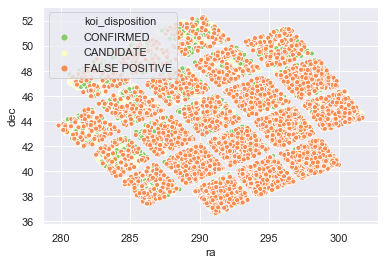

In [3]:
display(
    sns.scatterplot(
        data=dataset,
        x="ra",     
        y="dec",
        sizes=(25,25),
        size="koi_disposition", 
        size_order=['CONFIRMED', 'CANDIDATE', 'FALSE POSITIVE'],

        hue="koi_disposition", palette="RdYlGn_r",
        hue_order=['CONFIRMED', 'CANDIDATE', 'FALSE POSITIVE'],
    )
)

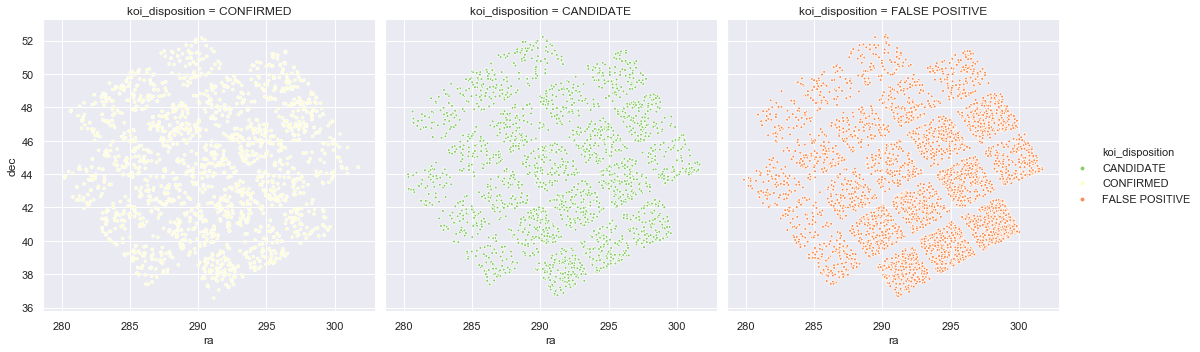

In [4]:
sns.relplot(
    data=dataset,    
    kind="scatter",
    col="koi_disposition", 
    col_order=['CONFIRMED', 'CANDIDATE', 'FALSE POSITIVE'],
    
    x="ra",     
    y="dec",    
    
    size='koi_disposition',
    sizes=(8,8),    
    hue="koi_disposition", palette="RdYlGn_r",
)